In [39]:
import pandas as pd
import numpy as np

In [40]:
def preprocess_text(text):
    text = text.lower().split()
    return [word.strip("°") for word in text]


def create_transition_df(tokens_t, tokens):
    unique_words = sorted(set(tokens_t))
    num_words = len(unique_words)
    transition_df = pd.DataFrame(0, index=unique_words, columns=unique_words)

    for i in range(len(tokens) - 1):
        current_word = tokens[i]
        next_word = tokens[i + 1]
        transition_df.loc[current_word, next_word] += 1

    # Normalizar las frecuencias de transición
    transition_df = transition_df.div(transition_df.sum(axis=1), axis=0)

    return transition_df


In [41]:
def cosine_ang(m1, m2):
  np_t1 = m1.to_numpy()
  np_t2 = m2.to_numpy()

  t1_T = np_t1.transpose()
  t2_T = np_t2.transpose()

  C = np.dot(t2_T, np_t1)
  prod_int = C.trace()

  normt1 = np.sqrt((np.dot(t1_T, np_t1)).trace())
  normt2 = np.sqrt((np.dot(t2_T, np_t2)).trace())

  cos_ang = prod_int/(normt1*normt2)

  return cos_ang


In [42]:
def markov(text1,text2):
  # Preprocesamiento de textos
  tokens1 = preprocess_text(text1)
  tokens2 = preprocess_text(text2)

  tokens = tokens1 + tokens2

  # Creación de DataFrames de transición
  transition_df1 = create_transition_df(tokens,tokens1).fillna(0)
  transition_df2 = create_transition_df(tokens,tokens2).fillna(0)

  return cosine_ang(transition_df1,transition_df2)

In [43]:
data = pd.read_csv('labels_tokenized.csv')


In [44]:
data['ResulComp'] = data.apply(
    lambda row: markov(row['sub1'], row['sub2']), axis=1)


In [45]:
def asignar_verdict(level, result):
    if result > level:
        return 1
    else:
        return 0


In [46]:
for i in range(100):
    name = str(i/100)
    level = i/100
    data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level, x))


C:\Users\HP\AppData\Local\Temp\ipykernel_22704\2257105454.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level, x))
C:\Users\HP\AppData\Local\Temp\ipykernel_22704\2257105454.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level, x))
C:\Users\HP\AppData\Local\Temp\ipykernel_22704\2257105454.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

In [47]:
total_registros = len(data)
rangos = []
precisiones_rangos = []
for i in range(100):
    name = str(i/100)
    coincidencias = (data['verdict'] == data[name]).sum()
    precision = coincidencias / total_registros
    rangos.append(float(name))
    precisiones_rangos.append(precision)
    print("Precisión de", name, "es:", precision)


Precisión de 0.0 es: 0.27552140504939626
Precisión de 0.01 es: 0.27552140504939626
Precisión de 0.02 es: 0.27552140504939626
Precisión de 0.03 es: 0.27552140504939626
Precisión de 0.04 es: 0.27552140504939626
Precisión de 0.05 es: 0.27552140504939626
Precisión de 0.06 es: 0.27552140504939626
Precisión de 0.07 es: 0.27552140504939626
Precisión de 0.08 es: 0.27552140504939626
Precisión de 0.09 es: 0.27552140504939626
Precisión de 0.1 es: 0.27552140504939626
Precisión de 0.11 es: 0.27552140504939626
Precisión de 0.12 es: 0.27552140504939626
Precisión de 0.13 es: 0.27552140504939626
Precisión de 0.14 es: 0.27552140504939626
Precisión de 0.15 es: 0.27552140504939626
Precisión de 0.16 es: 0.27552140504939626
Precisión de 0.17 es: 0.27552140504939626
Precisión de 0.18 es: 0.27552140504939626
Precisión de 0.19 es: 0.27552140504939626
Precisión de 0.2 es: 0.27552140504939626
Precisión de 0.21 es: 0.27552140504939626
Precisión de 0.22 es: 0.27552140504939626
Precisión de 0.23 es: 0.2755214050493

In [48]:
max_precision = max(precisiones_rangos)
indice_max_precision = precisiones_rangos.index(max_precision)
max_precision


0.8221734357848518

In [49]:
indice = str(rangos[indice_max_precision])
indice


'0.94'

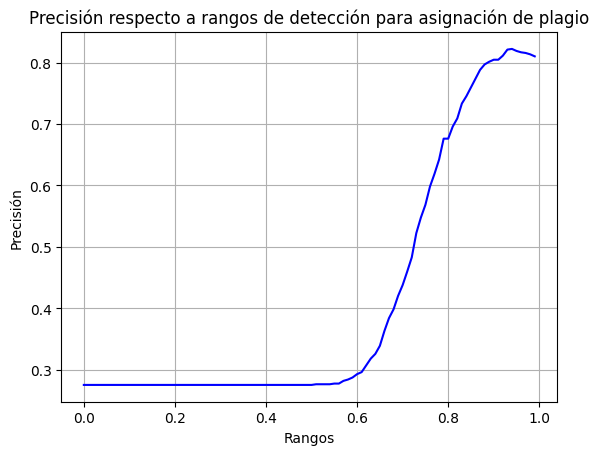

In [50]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = rangos
y = precisiones_rangos

# Crear el gráfico
plt.plot(x, y, color='blue')

# Establecer título y etiquetas de los ejes
plt.title("Precisión respecto a rangos de detección para asignación de plagio")
plt.xlabel('Rangos')
plt.ylabel('Precisión')

plt.grid(True)


# Mostrar el gráfico
plt.show()


In [51]:
data

,sub1,sub2,problem,verdict,ResulComp,0.0,0.01,0.02,0.03,0.04,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,IMPORT VARIABLE VARIABLE VARIABLE IMPORT VARIA...,IMPORT VARIABLE VARIABLE OPERATOR IMPORT VARIA...,19,0,0.722049,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,IMPORT VARIABLE VARIABLE OPERATOR PUBLIC CLASS...,IMPORT VARIABLE VARIABLE OPERATOR PUBLIC CLASS...,20,0,0.728741,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,IMPORT VARIABLE VARIABLE OPERATOR IMPORT VARIA...,IMPORT VARIABLE VARIABLE OPERATOR IMPORT VARIA...,14,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,IMPORT VARIABLE VARIABLE OPERATOR IMPORT VARIA...,IMPORT VARIABLE VARIABLE VARIABLE IMPORT VARIA...,6,0,0.885515,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,IMPORT VARIABLE VARIABLE VARIABLE IMPORT VARIA...,IMPORT VARIABLE VARIABLE OPERATOR PUBLIC CLASS...,15,0,0.806477,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,IMPORT VARIABLE VARIABLE VARIABLE IMPORT VARIA...,IMPORT VARIABLE VARIABLE VARIABLE IMPORT VARIA...,8,1,0.906954,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
907,IMPORT VARIABLE VARIABLE VARIABLE VARIABLE VAR...,IMPORT VARIABLE VARIABLE VARIABLE PUBLIC CLASS...,4,0,0.843928,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
908,IMPORT VARIABLE VARIABLE OPERATOR IMPORT VARIA...,IMPORT VARIABLE VARIABLE VARIABLE IMPORT VARIA...,17,0,0.764135,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
909,IMPORT VARIABLE VARIABLE OPERATOR IMPORT VARIA...,IMPORT VARIABLE VARIABLE OPERATOR IMPORT VARIA...,15,1,0.847774,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
datap = data


In [53]:
i = 1
precisiones = []
cortes = []
for i in range(100):
    datap = datap[datap["ResulComp"] > (i/100)]
    total_registros = len(datap)
    coincidencias = (datap['verdict'] == datap[indice]).sum()
    precision = coincidencias / total_registros
    precisiones.append(precision)
    cortes.append(i/100)
    print("coincidencias", coincidencias, "total_registros", total_registros)
    print("Precisión de", name, "es:", precision, "con corte en", (i/100))


coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.0
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.01
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.02
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.03
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.04
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.05
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.06
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.07
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.08
coincidencias 749 total_registros 911
Precisión de 0.99 es: 0.8221734357848518 con corte en 0.09
coincidencias 749 total_registr

In [54]:
max(precisiones)


1.0

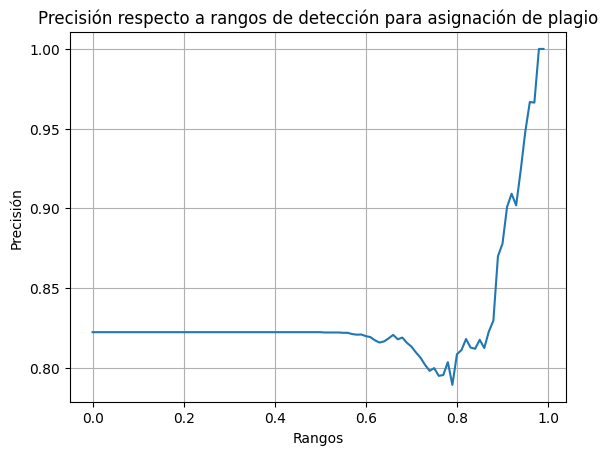

In [55]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = cortes
y = precisiones

# Crear el gráfico
plt.plot(x, y)


# Establecer título y etiquetas de los ejes
plt.title("Precisión respecto a rangos de detección para asignación de plagio")
plt.xlabel('Rangos')
plt.ylabel('Precisión')

plt.grid(True)


# Mostrar el gráfico
plt.show()
